In [1]:
from google.colab import drive
drive.mount('/drive')

Mounted at /drive


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras


In [4]:
path = '/drive/My Drive/Colab Notebooks/HCK/flood.csv'
df = pd.read_csv(path)

In [6]:
# --- Data Cleaning ---
print("Checking for missing values...")
print(df.isnull().sum())

Checking for missing values...
MonsoonIntensity                   0
TopographyDrainage                 0
RiverManagement                    0
Deforestation                      0
Urbanization                       0
ClimateChange                      0
DamsQuality                        0
Siltation                          0
AgriculturalPractices              0
Encroachments                      0
IneffectiveDisasterPreparedness    0
DrainageSystems                    0
CoastalVulnerability               0
Landslides                         0
Watersheds                         0
DeterioratingInfrastructure        0
PopulationScore                    0
WetlandLoss                        0
InadequatePlanning                 0
PoliticalFactors                   0
FloodProbability                   0
dtype: int64


In [7]:
# Features and Target
X = df.drop(['FloodProbability'], axis=1)
y = df['FloodProbability']

In [8]:
# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# ANN Model for Regression
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),  # Input + First Hidden Layer
    Dropout(0.2),                                                         # Dropout for regularization
    Dense(32, activation='relu'),                                         # Second Hidden Layer
    Dropout(0.2),
    Dense(16, activation='relu'),                                         # Third Hidden Layer
    Dense(1)                                                             # Output Layer (Regression)
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         1,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,969 (15.50 KB)

 Trainable params: 3,969 (15.50 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
# Training
history = model.fit(X_train_scaled, y_train, epochs=50, validation_split=0.1)

Epoch 1/50
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1.0501e-05 - mae: 0.0021 - val_loss: 1.8115e-04 - val_mae: 0.0107
Epoch 2/50
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 9.7291e-06 - mae: 0.0020 - val_loss: 2.0917e-04 - val_mae: 0.0114
Epoch 3/50
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 9.2452e-06 - mae: 0.0020 - val_loss: 2.2181e-04 - val_mae: 0.0118
Epoch 4/50
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 9.4263e-06 - mae: 0.0020 - val_loss: 1.7536e-04 - val_mae: 0.0106
Epoch 5/50
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1.0564e-05 - mae: 0.0021 - val_loss: 1.9878e-04 - val_mae: 0.0112
Epoch 6/50
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 8.2950e-06 - mae: 0.0018 - val_loss: 2.0172e-04 - val_mae: 0.0111
Epoch 7/50
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1.0355e-05 - mae: 0.0021 - val_loss: 2.1023e-04 - val_mae: 0.0113
Epoch 8/50
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 8.2075e-06 - mae: 0.0019 - val_loss: 2.252

In [12]:
import matplotlib.pyplot as plt

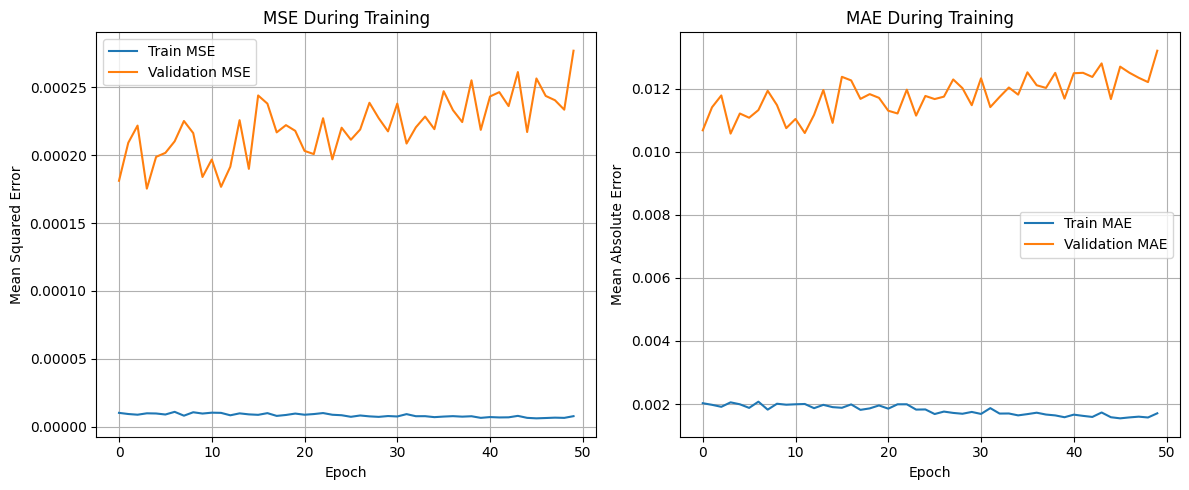

Test MSE: 0.5815
Test MAE: 0.7621


In [13]:
# --- Plot MSE & MAE ---

# Plot MSE (loss)
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Train MSE')
plt.plot(history.history['val_loss'], label='Validation MSE')
plt.title('MSE During Training')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.grid(True)

# Plot MAE
plt.subplot(1,2,2)
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('MAE During Training')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# --- Evaluate on Test Set ---
test_mse, test_mae = model.evaluate(X_test, y_test, verbose=0)
print(f"Test MSE: {test_mse:.4f}")
print(f"Test MAE: {test_mae:.4f}")

In [14]:
new_data = pd.DataFrame({
    'MonsoonIntensity': [5],
    'TopographyDrainage': [6],
    'RiverManagement': [4],
    'Deforestation': [5],
    'Urbanization': [7],
    'ClimateChange': [6],
    'DamsQuality': [3],
    'Siltation': [5],
    'AgriculturalPractices': [4],
    'Encroachments': [6],
    'IneffectiveDisasterPreparedness': [5],
    'DrainageSystems': [8],
    'CoastalVulnerability': [3],
    'Landslides': [4],
    'Watersheds': [5],
    'DeterioratingInfrastructure': [6],
    'PopulationScore': [5],
    'WetlandLoss': [4],
    'InadequatePlanning': [6],
    'PoliticalFactors': [5]
})

In [15]:
new_data_scaled = scaler.transform(new_data)

In [16]:
prediction = model.predict(new_data_scaled)
print("Predicted Flood Probability:", prediction[0][0])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 336ms/step
Predicted Flood Probability: 0.50664127


In [18]:
# Save model & scaler
model.save('flood_model.h5')
import joblib
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [21]:
from google.colab import files
files.download('flood_model.h5')
files.download('scaler.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [20]:
from sklearn.metrics import r2_score
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print("R² Score:", r2)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
R² Score: -232.48305690222617
